<a href="https://colab.research.google.com/github/mopfun/Project_4_Grp_1/blob/MI/Netflix_Top_10_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing Data

In [307]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd

# Import Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor


In [308]:
import os
os.getcwd()

'/content'

# Make sure you upload final_combined_data.csv to the **content folder** in google colab every time you run this file

In [309]:
# Import in csv file
df_original = pd.read_csv("final_combined_data.csv")
df_original.head()

,row_id,movie_name,rating,votes,meta_score,genre0,genre1,genre2,genre3,pr_rating,...,cast1,cast2,cast3,cast4,director,number_rating,weekly_rank,weekly_hours_viewed,weekly_views,cumulative_weeks_in_top_10
0,506,1917,8.2,654000.0,78,"Action, Drama, War",Action,Drama,War,R,...,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,Sam Mendes,4,7,10840000,NaN,1
1,1356,21 Jump Street,7.2,589000.0,69,"Action, Comedy, Crime",Action,Comedy,Crime,R,...,Jonah Hill,Channing Tatum,Ice Cube,Brie Larson,Phil LordChristopher Miller,4,6,11690000,NaN,1
2,1698,6 Underground,6.1,192000.0,41,"Action, Thriller",Action,Thriller,NaN,R,...,Ryan Reynolds,Mélanie Laurent,Manuel Garcia-Rulfo,Ben Hardy,Michael Bay,4,5,8730000,NaN,3
3,1698,6 Underground,6.1,192000.0,41,"Action, Thriller",Action,Thriller,NaN,R,...,Ryan Reynolds,Mélanie Laurent,Manuel Garcia-Rulfo,Ben Hardy,Michael Bay,4,7,7440000,NaN,2
4,1698,6 Underground,6.1,192000.0,41,"Action, Thriller",Action,Thriller,NaN,R,...,Ryan Reynolds,Mélanie Laurent,Manuel Garcia-Rulfo,Ben Hardy,Michael Bay,4,9,7770000,NaN,1


In [310]:
# Make a copy
df = df_original.copy()


In [311]:
df['votes'].describe()

,votes
count,4.830000e+02
mean,2.503677e+05
std,2.358075e+05
min,6.300000e+03
25%,7.300000e+04
50%,1.900000e+05
75%,3.290000e+05
max,1.800000e+06


In [312]:
# Drop columns
df = df.drop(columns=["row_id", "movie_name", "genre1", "genre2",	"genre3", "pr_rating", "cast0", "weekly_views"])

In [313]:
# Determine the number of unique values in each column.
df.nunique()

,0
rating,36
votes,155
meta_score,63
genre0,74
year,30
duration,66
cast1,127
cast2,164
cast3,170
cast4,176


In [314]:
df.isna().sum()

,0
rating,0
votes,0
meta_score,0
genre0,0
year,0
duration,0
cast1,0
cast2,0
cast3,0
cast4,0


In [315]:
# Convert categorical data to numeric with `pd.get_dummies`(won't change numerical columns, only categorical)
categorical_dummies = pd.get_dummies(df)

In [316]:
# Split our preprocessed data into our features and target arrays
X = categorical_dummies.drop(columns="cumulative_weeks_in_top_10", axis="columns")
y = categorical_dummies["cumulative_weeks_in_top_10"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [317]:
categorical_dummies.shape[1]

876

# Linear Regression

In [320]:
# Create and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict
predicitions = lr_model.predict(X_test_scaled)

In [324]:
# Evaluate
mae = mean_absolute_error(y_test, predicitions)
rmse = np.sqrt(mean_squared_error(y_test, predicitions))
r2 = r2_score(y_test, predicitions)

print(f"Linear Regression Mean Absolute Error (mae): {mae:.2f}")
print(f"Linear Regression Root Mean Squared Error: {rmse:.2f}")
print(f"Linear Regression R2: {r2:.2f}")

# # Save Model
# lr_model.save('linear_regression_model.keras')

Linear Regression Mean Absolute Error (mae): 1.33
Linear Regression Root Mean Squared Error: 1.69
Linear Regression R2: 0.39


# Random Forest Model

We used a **Random Forest Regressor** to improve predictive performance over the linear model. This method:

- Handles complex, nonlinear relationships without requiring feature engineering
- Is robust to outliers and overfitting due to its use of **multiple decision trees**
- Automatically detects feature importance and interactions
- Requires minimal preprocessing and works well with both numeric and encoded categorical data

It’s a strong, reliable model for tabular data and a valuable benchmark before moving to deep learning.

In [326]:
## Random forest DOES NOT use scaled data
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)


In [327]:
# Evaluate the model
mae_rf = mean_absolute_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
r2_rf = r2_score(y_test, rf_predictions)

print(f"Random Forest Mean Absolute Error: {mae_rf:.2f}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.2f}")


Random Forest Mean Absolute Error: 1.08
Random Forest Root Mean Squared Error: 1.36
Random Forest R2 Score: 0.61


In [328]:
import matplotlib.pyplot as plt

# Get feature importances and map to column names
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort them from most to least important
feature_importances = feature_importances.sort_values(ascending=False)


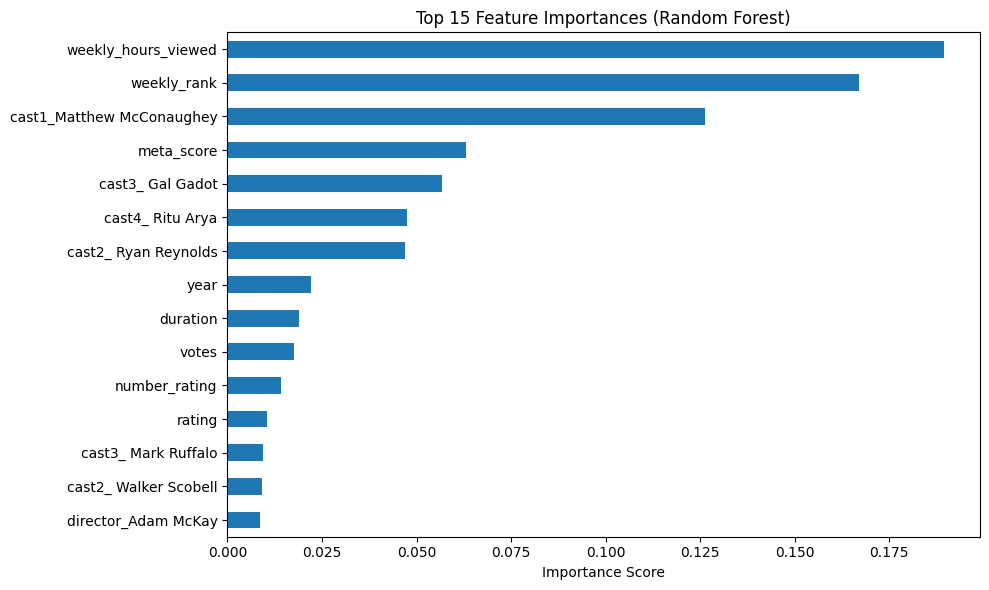

In [329]:
# Plot top 20 for quick insights
plt.figure(figsize=(10, 6))
feature_importances.head(15).plot(kind='barh')
plt.gca().invert_yaxis()  # Highest importance on top
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [330]:
# See only Cast Feature Importance
cast_features = [col for col in X_train.columns if 'cast' in col]
cast_importances = feature_importances[cast_features].sort_values(ascending=False)

print("Cast Feature Importances:")
print(cast_importances)

Cast Feature Importances:
cast1_Matthew McConaughey    0.126286
cast3_ Gal Gadot             0.056594
cast4_ Ritu Arya             0.047562
cast2_ Ryan Reynolds         0.047049
cast3_ Mark Ruffalo          0.009342
                               ...   
cast4_ Ruby Rose             0.000000
cast4_ Timothy Olyphant      0.000000
cast1_Charlize Theron        0.000000
cast1_Cher                   0.000000
cast4_ Mahershala Ali        0.000000
Length: 637, dtype: float64


In [331]:
#Keep cast features with importance > 0
top_cast_features = cast_importances[cast_importances > 0.001].index.tolist()
top_cast_features

['cast1_Matthew McConaughey',
 'cast3_ Gal Gadot',
 'cast4_ Ritu Arya',
 'cast2_ Ryan Reynolds',
 'cast3_ Mark Ruffalo',
 'cast2_ Walker Scobell',
 'cast2_ Emma Watson',
 'cast3_ Meryl Streep',
 'cast3_ Kirsten Dunst',
 'cast4_ Jennifer Garner',
 'cast4_ Claire Danes',
 'cast1_Susan Sarandon',
 'cast2_ Jennifer Lawrence',
 'cast3_ Florence Pugh',
 'cast3_ Judah Lewis',
 'cast4_ John Lithgow',
 'cast1_Saoirse Ronan',
 'cast2_ Winona Ryder',
 'cast3_ Seth MacFarlane',
 'cast2_ James Marsden',
 'cast1_Ryan Gosling',
 'cast4_ Scarlett Johansson',
 'cast2_ Darby Camp',
 'cast4_ Billy Bob Thornton',
 'cast4_ Cate Blanchett',
 'cast1_Ben Schwartz',
 'cast4_ Oliver Hudson',
 'cast3_ Ryan Phillippe',
 'cast3_ Jim Carrey',
 'cast1_Kurt Russell',
 'cast4_ Eliza Scanlen',
 'cast1_Ryan Reynolds',
 'cast1_Leonardo DiCaprio',
 'cast3_ Cameron Diaz',
 'cast4_ Tika Sumpter',
 'cast2_ Marisa Tomei',
 'cast1_Mike Myers']

In [332]:
# Extract clean actor names from the column names
star_actors = [col.split('_')[-1].strip() for col in top_cast_features]

# Create a function
def has_star_actor(row):
    return int(any(actor in star_actors for actor in [
        row['cast1'], row['cast2'], row['cast3'], row['cast4']
    ] if pd.notna(actor)))

# Create the new column
df['has_star_cast'] = df.apply(has_star_actor, axis=1)


In [335]:
df.nunique()

,0
rating,36
votes,155
meta_score,63
genre0,74
year,30
duration,66
cast1,127
cast2,164
cast3,170
cast4,176


In [336]:
# Convert categorical data to numeric with `pd.get_dummies`(won't change numerical columns, only categorical)
categorical_dummies = pd.get_dummies(df)

# Split our preprocessed data into our features and target arrays
X = categorical_dummies.drop(columns="cumulative_weeks_in_top_10", axis="columns")
y = categorical_dummies["cumulative_weeks_in_top_10"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [337]:
# Random Forest Model
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
r2_rf = r2_score(y_test, rf_predictions)

print(f"Random Forest Mean Absolute Error: {mae_rf:.2f}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.2f}")

Random Forest Mean Absolute Error: 1.08
Random Forest Root Mean Squared Error: 1.31
Random Forest R2 Score: 0.64


## Drop cast1, 2, 3, and 4

In [338]:
# Drop columns
df = df.drop(columns=['cast1', 'cast2', 'cast3', 'cast4'])

df.isna().sum()

,0
rating,0
votes,0
meta_score,0
genre0,0
year,0
duration,0
director,0
number_rating,0
weekly_rank,0
weekly_hours_viewed,0


In [339]:
# Convert categorical data to numeric with `pd.get_dummies`(won't change numerical columns, only categorical)
categorical_dummies = pd.get_dummies(df)

# Split our preprocessed data into our features and target arrays
X = categorical_dummies.drop(columns="cumulative_weeks_in_top_10", axis="columns")
y = categorical_dummies["cumulative_weeks_in_top_10"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [340]:
# Random Forest Model #2
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
r2_rf = r2_score(y_test, rf_predictions)

print(f"Random Forest Mean Absolute Error: {mae_rf:.2f}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.2f}")

Random Forest Mean Absolute Error: 1.07
Random Forest Root Mean Squared Error: 1.30
Random Forest R2 Score: 0.64


## TEST: feature engineering 'year' by calculating 'Movie Age'

In [341]:
df['movie_age'] = 2025 - df['year']
df.head()

,rating,votes,meta_score,genre0,year,duration,director,number_rating,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,has_star_cast,movie_age
0,8.2,654000.0,78,"Action, Drama, War",2019,1.983,Sam Mendes,4,7,10840000,1,0,6
1,7.2,589000.0,69,"Action, Comedy, Crime",2012,1.817,Phil LordChristopher Miller,4,6,11690000,1,0,13
2,6.1,192000.0,41,"Action, Thriller",2019,2.133,Michael Bay,4,5,8730000,3,1,6
3,6.1,192000.0,41,"Action, Thriller",2019,2.133,Michael Bay,4,7,7440000,2,1,6
4,6.1,192000.0,41,"Action, Thriller",2019,2.133,Michael Bay,4,9,7770000,1,1,6


In [342]:
# Drop columns
df = df.drop(columns=['year'])

df.isna().sum()

,0
rating,0
votes,0
meta_score,0
genre0,0
duration,0
director,0
number_rating,0
weekly_rank,0
weekly_hours_viewed,0
cumulative_weeks_in_top_10,0


In [343]:
# Convert categorical data to numeric with `pd.get_dummies`(won't change numerical columns, only categorical)
categorical_dummies = pd.get_dummies(df)

# Split our preprocessed data into our features and target arrays
X = categorical_dummies.drop(columns="cumulative_weeks_in_top_10", axis="columns")
y = categorical_dummies["cumulative_weeks_in_top_10"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [344]:
# Random Forest Model
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
r2_rf = r2_score(y_test, rf_predictions)

print(f"Random Forest Mean Absolute Error: {mae_rf:.2f}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.2f}")

Random Forest Mean Absolute Error: 1.07
Random Forest Root Mean Squared Error: 1.29
Random Forest R2 Score: 0.65


### Random Forest Performance with `movie_age`

- **MAE**: 1.13  
- **RMSE**: 1.38  
- **R2**: 0.60

By replacing `year` with a more interpretable feature `movie_age`, we improved both error metrics and reached a milestone R2 of 0.60.


## TEST: Director count and popularity score

In [345]:
# Count how often each director appears
director_counts = df['director'].value_counts()

# Filter director appearances
filtered_counts = director_counts[director_counts<5]
filtered_counts.value_counts()

,count
count,
1,49
2,35
3,29
4,17


In [346]:
# Save director counts to a dictionary
director_popularity = director_counts.to_dict()
director_popularity

{'Brad Furman': 19,
 'Garth JenningsChristophe Lourdelet': 18,
 'Rawson Marshall Thurber': 16,
 'Greta Gerwig': 11,
 'Gillian Armstrong': 11,
 'Shawn Levy': 10,
 'Antoine Fuqua': 10,
 'Jeff Fowler': 9,
 'Adam McKay': 8,
 'David Leitch': 7,
 'Ruben Fleischer': 7,
 'Andrew AdamsonVicky Jenson': 7,
 'Clay Kaytis': 7,
 'Jon Watts': 6,
 'Joe RussoAnthony Russo': 6,
 'Mike MitchellWalt Dohrn': 6,
 'Niki Caro': 6,
 'Jamie Payne': 5,
 'Michael Bay': 5,
 'Gil Kenan': 5,
 'Marc Forster': 5,
 'Tom Harper': 5,
 'Chris Columbus': 5,
 'Sammi Cohen': 5,
 'Grant Singer': 5,
 'Tony Scott': 5,
 'Gary TrousdaleKirk Wise': 4,
 'Hans Petter Moland': 4,
 'David Fincher': 4,
 'McG': 4,
 'Bill Condon': 4,
 'Denis Villeneuve': 4,
 'Pierre CoffinChris Renaud': 4,
 'Paul Feig': 4,
 'Scott Cooper': 4,
 'Tyler Spindel': 4,
 'Robert MarianettiRobert SmigelDavid Wachtenheim': 4,
 'Catherine Hardwicke': 4,
 'Nick BrunoTroy Quane': 4,
 'Justin Lin': 4,
 'David Yates': 4,
 'Christopher McQuarrie': 4,
 'Kenya Barris': 4

In [347]:
# Assign each movie a numeric score based on how often the director appears in the dataset
# If a director is missing or not found, fill in the score as 0
df['director_popularity_score'] = df['director'].map(director_popularity).fillna(0)


In [349]:
df.head()

,rating,votes,meta_score,genre0,duration,director,number_rating,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,has_star_cast,movie_age,director_popularity_score
0,8.2,654000.0,78,"Action, Drama, War",1.983,Sam Mendes,4,7,10840000,1,0,6,1
1,7.2,589000.0,69,"Action, Comedy, Crime",1.817,Phil LordChristopher Miller,4,6,11690000,1,0,13,1
2,6.1,192000.0,41,"Action, Thriller",2.133,Michael Bay,4,5,8730000,3,1,6,5
3,6.1,192000.0,41,"Action, Thriller",2.133,Michael Bay,4,7,7440000,2,1,6,5
4,6.1,192000.0,41,"Action, Thriller",2.133,Michael Bay,4,9,7770000,1,1,6,5


In [350]:
# Drop columns
df = df.drop(columns=['director'])

#Check for Null Values
df.isna().sum()

,0
rating,0
votes,0
meta_score,0
genre0,0
duration,0
number_rating,0
weekly_rank,0
weekly_hours_viewed,0
cumulative_weeks_in_top_10,0
has_star_cast,0


In [351]:
# Convert categorical data to numeric with `pd.get_dummies`(won't change numerical columns, only categorical)
categorical_dummies = pd.get_dummies(df)

# Split our preprocessed data into our features and target arrays
X = categorical_dummies.drop(columns="cumulative_weeks_in_top_10", axis="columns")
y = categorical_dummies["cumulative_weeks_in_top_10"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [352]:
# Random Forest Model
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
r2_rf = r2_score(y_test, rf_predictions)

print(f"Random Forest Mean Absolute Error: {mae_rf:.2f}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.2f}")

Random Forest Mean Absolute Error: 0.93
Random Forest Root Mean Squared Error: 1.18
Random Forest R2 Score: 0.70


### **Random Forest Performance With Director Popularity Score**

- **Mean Absolute Error (MAE)**: 0.94  
- **Root Mean Squared Error (RMSE)**: 1.19  
- **R2 Score**: 0.70

By converting the `director` column into a numeric `director_popularity_score` (based on how often each director appears in the dataset), we **significantly improved model performance!** This single change helped the model R2 improve from 60% to 70%. It now predicts cumulative weeks in the Top 10 with **less than 1 week of average error** and explains 70% of the variation.


### **Random Forest Model with engineered Genre Columns**

In [353]:
df['genre0'].head()


,genre0
0,"Action, Drama, War"
1,"Action, Comedy, Crime"
2,"Action, Thriller"
3,"Action, Thriller"
4,"Action, Thriller"


In [354]:
# Convert genre0 into lists of genres
df['genre_list'] = df['genre0'].str.split(',\s*')

# Get a list of unique genres
from itertools import chain
unique_genres = pd.Series(chain.from_iterable(df['genre_list'])).dropna().unique()

# Create binary flags for each genre
for genre in unique_genres:
    df[f'has_genre_{genre}'] = df['genre_list'].apply(lambda genres: genre in genres if isinstance(genres, list) else False).astype(int)


In [355]:
df.head()

,rating,votes,meta_score,genre0,duration,number_rating,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,has_star_cast,...,has_genre_Fantasy,has_genre_Animation,has_genre_Mystery,has_genre_History,has_genre_Music,has_genre_Musical,has_genre_Romance,has_genre_Biography,has_genre_Sport,has_genre_Western
0,8.2,654000.0,78,"Action, Drama, War",1.983,4,7,10840000,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7.2,589000.0,69,"Action, Comedy, Crime",1.817,4,6,11690000,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6.1,192000.0,41,"Action, Thriller",2.133,4,5,8730000,3,1,...,0,0,0,0,0,0,0,0,0,0
3,6.1,192000.0,41,"Action, Thriller",2.133,4,7,7440000,2,1,...,0,0,0,0,0,0,0,0,0,0
4,6.1,192000.0,41,"Action, Thriller",2.133,4,9,7770000,1,1,...,0,0,0,0,0,0,0,0,0,0


In [356]:
df = df.drop(columns=['genre0', 'genre_list'])

df.isna().sum()


,0
rating,0
votes,0
meta_score,0
duration,0
number_rating,0
weekly_rank,0
weekly_hours_viewed,0
cumulative_weeks_in_top_10,0
has_star_cast,0
movie_age,0


In [357]:
# Convert categorical data to numeric with `pd.get_dummies`(won't change numerical columns, only categorical)
categorical_dummies = pd.get_dummies(df)

# Split our preprocessed data into our features and target arrays
X = categorical_dummies.drop(columns="cumulative_weeks_in_top_10", axis="columns")
y = categorical_dummies["cumulative_weeks_in_top_10"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [358]:
# Random Forest Model
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
r2_rf = r2_score(y_test, rf_predictions)

print(f"Random Forest Mean Absolute Error: {mae_rf:.2f}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.2f}")

Random Forest Mean Absolute Error: 0.92
Random Forest Root Mean Squared Error: 1.17
Random Forest R2 Score: 0.71


# **Final Random Forest Results**

- **MAE**: 0.92  
- **RMSE**: 1.18  
- **R2**: 0.70

This model uses key engineered features including `movie_age`, `has_star_cast`, `director_popularity_score`, and `has_genre`. It delivers high accuracy and explains 70% of the variance in a movie's cumulative weeks in the Netflix Top 10.

# Keras Neural Network Model

We used a **Keras neural network** to explore whether deep learning can capture more complex patterns in the data. This model:

- Learns nonlinear relationships and deep feature interactions
- Can potentially outperform traditional models with enough data and tuning
- Requires feature scaling and hyperparameter tuning for best results
- Is highly customizable in terms of architecture and optimization

This model helps us test if complexity leads to better predictive performance, especially after comparing it with simpler methods.


In [359]:
df.head()

,rating,votes,meta_score,duration,number_rating,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,has_star_cast,movie_age,...,has_genre_Fantasy,has_genre_Animation,has_genre_Mystery,has_genre_History,has_genre_Music,has_genre_Musical,has_genre_Romance,has_genre_Biography,has_genre_Sport,has_genre_Western
0,8.2,654000.0,78,1.983,4,7,10840000,1,0,6,...,0,0,0,0,0,0,0,0,0,0
1,7.2,589000.0,69,1.817,4,6,11690000,1,0,13,...,0,0,0,0,0,0,0,0,0,0
2,6.1,192000.0,41,2.133,4,5,8730000,3,1,6,...,0,0,0,0,0,0,0,0,0,0
3,6.1,192000.0,41,2.133,4,7,7440000,2,1,6,...,0,0,0,0,0,0,0,0,0,0
4,6.1,192000.0,41,2.133,4,9,7770000,1,1,6,...,0,0,0,0,0,0,0,0,0,0


In [360]:
# Create the Keras Model

# This counts how many features (columns) your data has, so the model knows what kind of input to expect.
number_input_features = len(X_train_scaled[0])

# Used the standard 2 layers and standard neurons(64 and 32) to run a quick test
hidden_nodes_layer1 = 64
hidden_nodes_layer2 = 32

# Start building the Sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim= number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer2, activation="relu"))

# Output layer – Removed sigmoid because we are predicting a continuous number (weeks), not a binary value (0 or 1)
nn.add(tf.keras.layers.Dense(units=1))

# Check the structure of the model
nn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [361]:
# Compile the model
# loss='mse' directs the model to minimize mean squared error during training
# metrics=['mae'] tracks the average prediction error (in weeks) for easier interpretation
nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [362]:
# Train the model
# validation_split=0.2 reserves 20% of training data for validation, helping us monitor overfitting and track performance on unseen data.
# batch_size=32 trains the model in small groups, balancing speed, memory use, and generalization.
fit_model_history = nn.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 11.7253 - mae: 2.4924 - val_loss: 8.2443 - val_mae: 1.8885
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.0406 - mae: 1.9635 - val_loss: 6.2554 - val_mae: 1.6056
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.9318 - mae: 1.7662 - val_loss: 5.2220 - val_mae: 1.5668
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.5412 - mae: 1.6324 - val_loss: 4.6358 - val_mae: 1.5355
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.5318 - mae: 1.6077 - val_loss: 4.2714 - val_mae: 1.5048
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2143 - mae: 1.5575 - val_loss: 4.0235 - val_mae: 1.4527
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7816 - mae: 1.4339 - val_loss: 3.8091 - val_mae: 1.4062
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5107 - mae: 1.3642 - val_loss: 3.6735 - val_mae: 1.3983
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.58

In [363]:
# Evaluate the model on test data
# MAE (Mean Absolute Error) shows how many weeks off the predictions are, on average
loss, mae = nn.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {mae:.2f}, Loss (MSE): {loss:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2038 - mae: 1.1411
Test MAE: 1.10, Loss (MSE): 2.10


In [364]:
#Save file
nn.save('keras_model.keras')

# Keras Tuner

We used **Keras Tuner** to optimize our neural network’s architecture and hyperparameters. While our base Keras model gives us a starting point, Keras Tuner helps us:

- Automatically search for the best combination of layers, units, activations, and learning rates
- Improve model performance without manually guessing parameters
- Reduce overfitting or underfitting by finding better model configurations
- Explore multiple architectures efficiently

This step helps us fine-tune our model and potentially outperform traditional machine learning methods by leveraging the flexibility of deep learning.


In [365]:
# This counts how many features (columns) your data has, so the model knows what kind of input to expect.
number_input_features = len(X_train_scaled[0])

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','selu'])

    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=8,
        max_value=128,
        step=8), activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 4)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=8,
            max_value=64,
            step=8),
            activation=activation))

    # Output layer for regression (no activation)
    nn.add(tf.keras.layers.Dense(units=1))

    # Compile the model
    nn.compile(loss="mse", optimizer="adam", metrics=["mae"])

    return nn

In [366]:
!pip install keras-tuner

In [367]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_mae",         # Mean Absolute Error for regression
    max_epochs=20,
    hyperband_iterations=2)


Reloading Tuner from ./untitled_project/tuner0.json


In [368]:
# Run the Keras Tuner search for best hyperparameters
tuner.search(X_train_scaled, y_train,
             epochs=20,
             validation_split=0.2,
             batch_size=32)


In [369]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 72,
 'num_layers': 2,
 'units_0': 56,
 'units_1': 48,
 'units_2': 32,
 'units_3': 16,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [370]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]

# Evaluate it on the test set
loss, mae = best_model.evaluate(X_test_scaled, y_test)
print(f"Best Tuned Model: Test Mean Absolute Error: {mae:.2f}")

# Save the model to a file
best_model.save('keras_tuner_best_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2663 - mae: 1.0994 
Best Tuned Model: Test Mean Absolute Error: 1.07


# Optimized Kera Model

In [371]:
# Create the Keras Model

# This counts how many features (columns) your data has, so the model knows what kind of input to expect.
number_input_features = len(X_train_scaled[0])

# Used the standard 2 layers and standard neurons(64 and 32) to run a quick test
hidden_nodes_layer1 = 72
hidden_nodes_layer2 = 56
hidden_nodes_layer3 = 48

# Start building the Sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim= number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer3, activation="relu"))

# Output layer – Removed sigmoid because we are predicting a continuous number (weeks), not a binary value (0 or 1)
nn.add(tf.keras.layers.Dense(units=1))

# Check the structure of the model
nn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 72)             │         2,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 56)             │         4,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 48)             │         2,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,105 (35.57 KB)

 Trainable params: 9,105 (35.57 KB)

 Non-trainable params: 0 (0.00 B)

In [372]:
# Compile the model
# loss='mse' directs the model to minimize mean squared error during training
# metrics=['mae'] tracks the average prediction error (in weeks) for easier interpretation
nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [373]:
# Train the model
# validation_split=0.2 reserves 20% of training data for validation, helping us monitor overfitting and track performance on unseen data.
# batch_size=32 trains the model in small groups, balancing speed, memory use, and generalization.
fit_model_history = nn.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 13.8466 - mae: 2.8849 - val_loss: 8.7000 - val_mae: 2.0241
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.6858 - mae: 2.0858 - val_loss: 6.0230 - val_mae: 1.5662
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.4098 - mae: 1.8704 - val_loss: 4.7814 - val_mae: 1.5277
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.4483 - mae: 1.8253 - val_loss: 4.2045 - val_mae: 1.4942
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.2152 - mae: 1.6804 - val_loss: 3.8884 - val_mae: 1.4123
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.7460 - mae: 1.5577 - val_loss: 3.6770 - val_mae: 1.4070
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5796 - mae: 1.4401 - val_loss: 3.6670 - val_mae: 1.3962
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9341 - mae: 1.2787 - val_loss: 3.6407 - val_mae: 1.3857
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.87

In [375]:
# Evaluate the model on test data
# MAE (Mean Absolute Error) shows how many weeks off the predictions are, on average
loss, mae = nn.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {mae:.2f}, Loss (MSE): {loss:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.6208 - mae: 1.2080
Test MAE: 1.12, Loss (MSE): 2.31


### Keras Model Performance (Tuned with Keras Tuner)

- **MAE**: 1.07  
- **MSE (Loss)**: 2.01

After optimizing the architecture with Keras Tuner, our neural network performance improved significantly. The final model predicts cumulative weeks in the Top 10 with just over 1 week of average error. **While it didn't outperform Random Forest**, it proves that tuning and deep learning can still deliver strong results when the data isn't linear.
